In [1265]:
import pandas as pd
import numpy as np

## Step 1 : Data Understanding 

In [1266]:
# Read the dataset 
bikesDF = pd.read_csv("day.csv")

In [1137]:
# Check the data
bikesDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1138]:
# Check the shape of the dataset
bikesDF.shape

(730, 16)

In [1139]:
# Checking if the info of the dataset
bikesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1140]:
# Checking if there are any null values
bikesDF.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Observation : There are no NULL values in any of the columns

In [1141]:
### Drop columns : instant, dteday, casual, registered
drop_list = ["instant", "dteday", "casual", "registered"]
bikesDF.drop(drop_list, axis=1, inplace=True)

##### Observation : 
- instant - It's an index column and can be removed 
- dteday - This info is extracted in separate columns
- casual & registered - It is the extraction of cnt variable and won't be useful for the analysis

## Step 2 : Visualising the data

In [1145]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

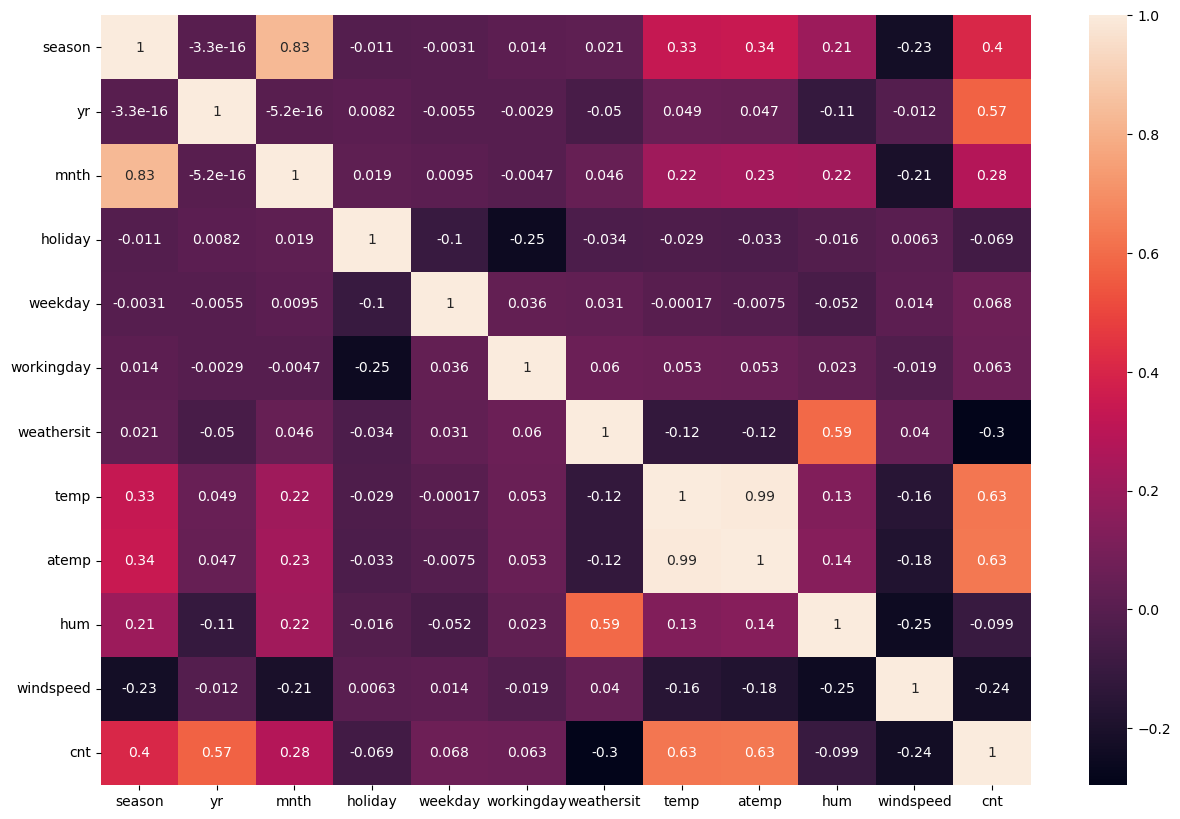

In [1146]:
# Draw a heatmap to check the correlation of the variables
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(bikesDF.corr(), annot=True, ax=ax)

##### Observation
- temp, atemp columns have good corelation with cnt
- with yr and month being the next best
- temp and atemp are highly corelated and they will give us the similar outcome. atemp can be ignored and dropped for our analysis

In [1147]:
# Divide the categorical and numerical values
categorical_vars = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
numerical_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

<function matplotlib.pyplot.show(close=None, block=None)>

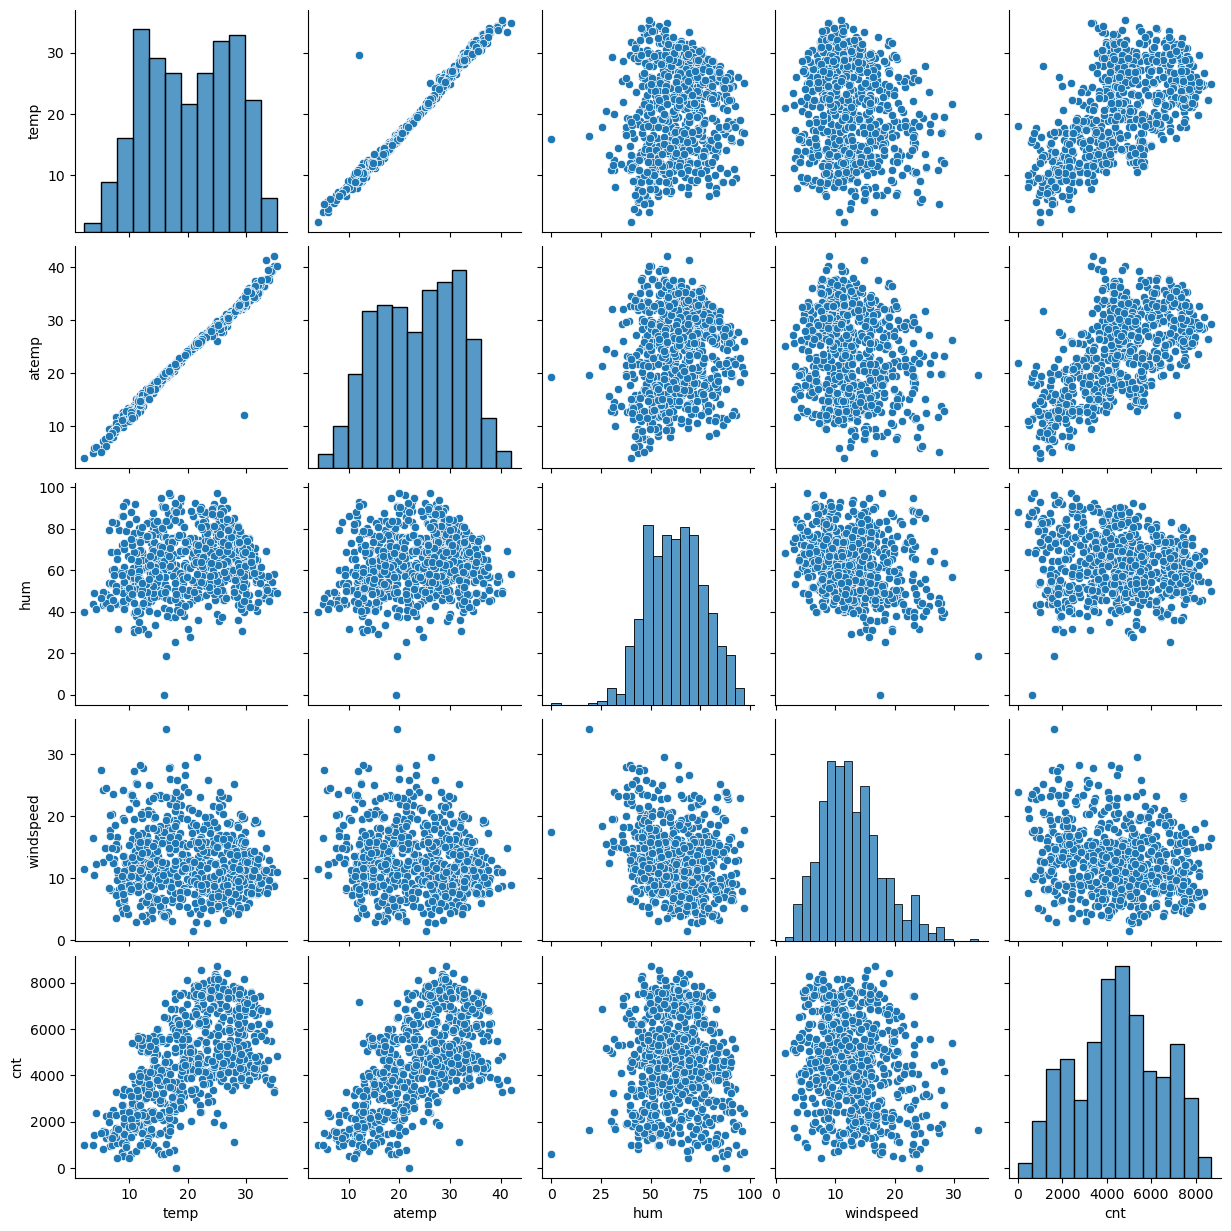

In [1148]:
# Derive the pairplot to identify the relation between the numerical variables and the target variables
sns.pairplot(bikesDF[numerical_vars])
plt.show

##### Observation
- As per the above graphs, temp and atemp has good relation with the target variable
- Whereas hum and windspeed appears to be out of propotion in terms of relationship

<function matplotlib.pyplot.show(close=None, block=None)>

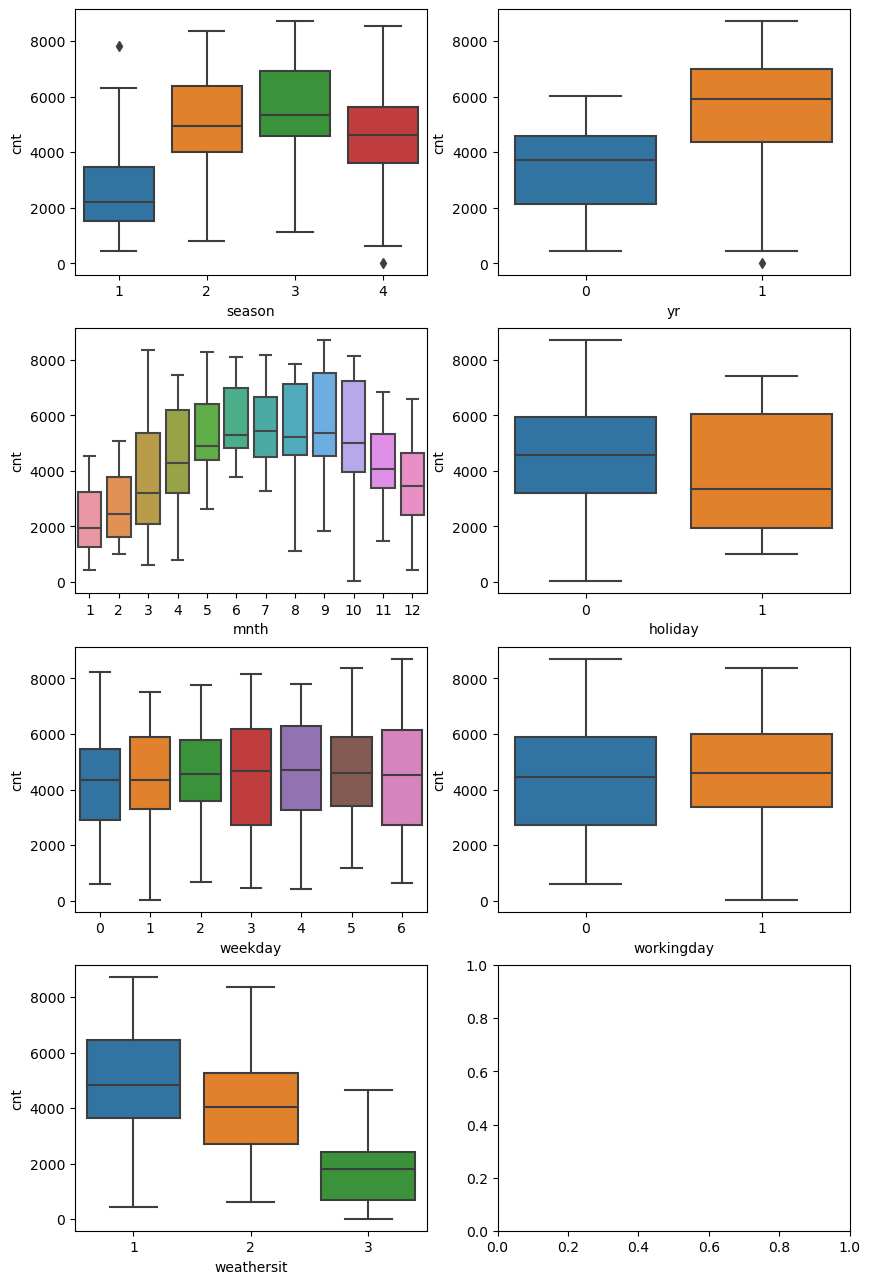

In [1149]:
# Create a box plot on the categorical variables
# "season","yr","mnth","holiday","weekday","workingday","weathersit"
plt.figure(figsize=(10, 20))
plt.subplot(5,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesDF)
plt.subplot(5,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesDF)
plt.subplot(5,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesDF)
plt.subplot(5,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesDF)
plt.subplot(5,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesDF)
plt.subplot(5,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesDF)
plt.subplot(5,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesDF)
plt.subplot(5,2,8)
plt.show


##### Observation
- Season 2 and 3 i.e. 2:summer, 3:fall has the highest riders
- Year 2019 has attracted more riders compared to the previous years
- June, July, August, September, October has more riders
- Clear, Few clouds, Partly cloudy, Partly cloudy has the highest riders 

## Step 3 : Data preparation

In [1150]:
bikesDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1151]:
# Checking the count for each category before converting to the actual values for 'season' column
bikesDF.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1152]:
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
bikesDF["season"] = bikesDF["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bikesDF.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [1153]:
# Checking the count for each category before converting to the actual values for 'yr' column
bikesDF.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [1154]:
# Checking the count for each category before converting to the actual values for 'weather' column
bikesDF.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [1155]:
# weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bikesDF["weathersit"] = bikesDF["weathersit"].map({1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
                                                  2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                                                  3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                                  4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})
bikesDF.weathersit.value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [1156]:
# Checking the count for each category before converting to the actual values for 'weekday' column
bikesDF.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [1157]:
# weekday : day of the week
bikesDF["weekday"] = bikesDF["weekday"].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday",
                                            5:"Friday", 6:"Saturday"})
bikesDF.weekday.value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [1158]:
# Checking the count for each category before converting to the actual values for 'mnth' column
bikesDF.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [1159]:
#- mnth : month ( 1 to 12)
bikesDF["mnth"] = bikesDF["mnth"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May",
                                            6:"June", 7:"July", 8:"August", 9:"September", 10:"October",
                                       11:"November", 12:"December"
                                      })
bikesDF.mnth.value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64

In [1160]:
bikesDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


## Step 4 : Dummy variables

In [1161]:
# Creating dummy variables for 'season' column
seasonDF = pd.get_dummies(bikesDF['season'], drop_first=True)

In [1162]:
seasonDF.head(2)

,spring,summer,winter
0,1,0,0
1,1,0,0


In [1163]:
# Concatinating the dummy variable DF with the main DF
bikesDF_season = pd.concat([seasonDF,bikesDF], axis=1)

In [1164]:
bikesDF_season.head(2)

,spring,summer,winter,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,spring,0,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,spring,0,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801


In [1165]:
# Dropping the original column from the final dataset
bikesDF_season.drop("season", axis=1, inplace=True)

In [1166]:
# Creating dummy variables for 'weathersit' column
weatherDF = pd.get_dummies(bikesDF_season['weathersit'], drop_first=True)

In [1167]:
weatherDF.head(2)

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1
1,0,1


In [1168]:
# Concatinating the dummy variable DF with the main DF
bikesDF_weather = pd.concat([weatherDF,bikesDF_season], axis=1)

In [1169]:
# Dropping the original column from the final dataset
bikesDF_weather.drop("weathersit", axis=1, inplace=True)

In [1170]:
bikesDF_weather.head(2)

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,0,1,1,0,0,0,January,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,985
1,0,1,1,0,0,0,January,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,801


In [1171]:
# Creating dummy variables for 'mnth' column
monthDF = pd.get_dummies(bikesDF_weather['mnth'], drop_first=True)

In [1172]:
monthDF.head(2)

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0


In [1173]:
# Concatinating the dummy variable DF with the main DF
bikesDF_month = pd.concat([monthDF,bikesDF_weather], axis=1)

In [1174]:
# Dropping the original column from the final dataset
bikesDF_month.drop("mnth", axis=1, inplace=True)

In [1175]:
bikesDF_month.head(2)

,August,December,February,January,July,June,March,May,November,October,...,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,801


In [1176]:
# Creating dummy variables for 'weekday' column
weekdayDF = pd.get_dummies(bikesDF_month['weekday'], drop_first=True)

In [1177]:
weekdayDF.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0


In [1178]:
# Concatinating the dummy variable DF with the main DF
bikesDF_final = pd.concat([weekdayDF,bikesDF_month], axis=1)

In [1179]:
# Dropping the original column from the final dataset
bikesDF_final.drop("weekday", axis=1, inplace=True)

In [1180]:
bikesDF_final.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801


In [1181]:
# Renaming the long column names as the column names are too long
bikesDF_final.rename(columns = {'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':'light_snow','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist':'misty'}, inplace = True) 


In [1182]:
# Dropping the atemp column, as observed in the heatmap the correlation of temp and atemp is high
bikesDF_final.drop("atemp", axis=1, inplace=True)

In [1183]:
# Verifying the final dataset info
bikesDF_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Monday      730 non-null    uint8  
 1   Saturday    730 non-null    uint8  
 2   Sunday      730 non-null    uint8  
 3   Thursday    730 non-null    uint8  
 4   Tuesday     730 non-null    uint8  
 5   Wednesday   730 non-null    uint8  
 6   August      730 non-null    uint8  
 7   December    730 non-null    uint8  
 8   February    730 non-null    uint8  
 9   January     730 non-null    uint8  
 10  July        730 non-null    uint8  
 11  June        730 non-null    uint8  
 12  March       730 non-null    uint8  
 13  May         730 non-null    uint8  
 14  November    730 non-null    uint8  
 15  October     730 non-null    uint8  
 16  September   730 non-null    uint8  
 17  light_snow  730 non-null    uint8  
 18  misty       730 non-null    uint8  
 19  spring      730 non-null    u

In [1184]:
# Printing the sample for the final datset
bikesDF_final.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801


In [1185]:
bikesDF_final.shape

(730, 29)

In [1186]:
# Checking the final datset variations
bikesDF_final.describe()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.084932,0.084932,0.076712,0.084932,...,0.246575,0.252055,0.243836,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.278971,0.278971,0.266317,0.278971,...,0.431313,0.434490,0.429689,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


## Step 4 : Splitting the test and train dataset

In [1187]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
df_train, df_test = train_test_split(bikesDF_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1188]:
df_train.shape

(510, 29)

In [1189]:
df_test.shape

(219, 29)

In [1190]:
# Sample data of TRAINING dataset
df_train.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,19.201653,55.8333,12.208807,7534
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,29.246653,70.4167,11.083475,7216


In [1191]:
# Sample data of TEST dataset
df_test.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211


## Step 5:  Rescaling the features

In [1192]:
from sklearn.preprocessing import MinMaxScaler

In [1193]:
# Instantiate the object
scaler = MinMaxScaler()

In [1194]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1195]:
df_train.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [1196]:
# Checking the values for each column after scaling
df_train.describe()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.096078,0.084314,0.066667,0.088235,...,0.243137,0.245098,0.24902,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.294988,0.278131,0.249689,0.283915,...,0.429398,0.430568,0.43287,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


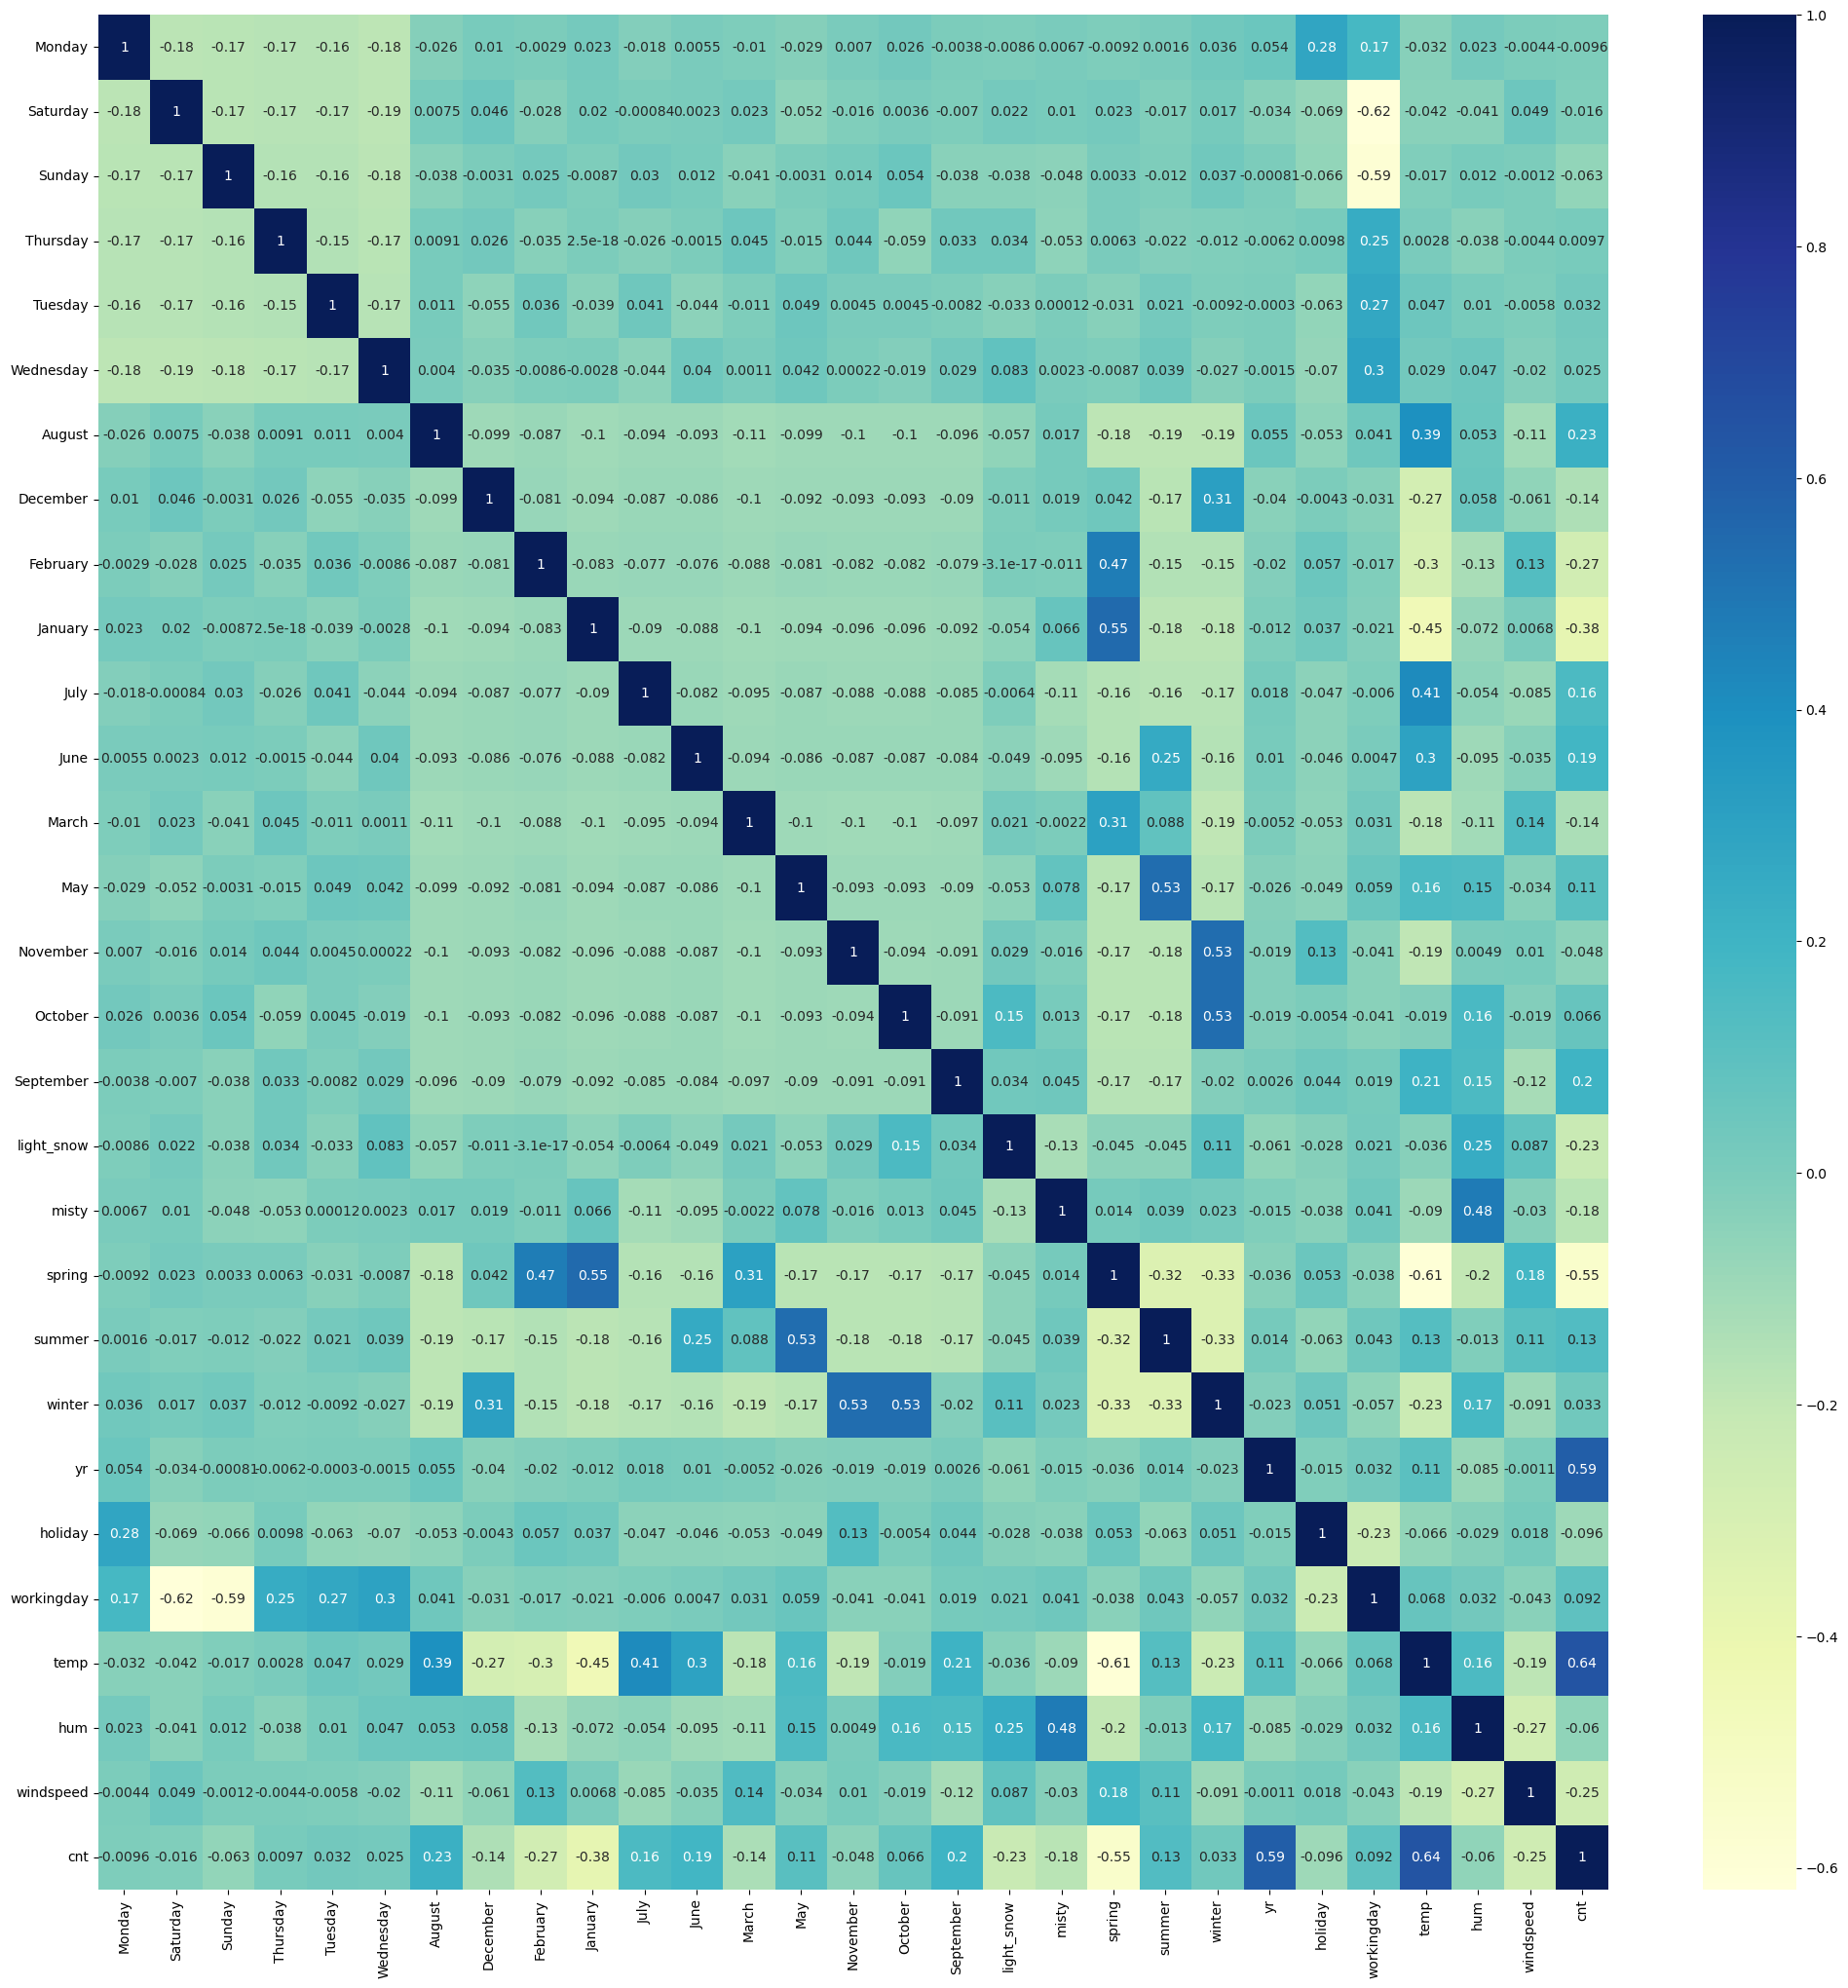

In [1197]:
# Checking the variables to find out the highly correlated variables
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Observation
- Temp, yr has top/high correlation with cnt variable

## Step 7 : Building a linear model
- Fit a regression line through the training data using statsmodels

In [1198]:
# Divide the X and Y training data
y_train = df_train.pop('cnt')
X_train = df_train

In [1199]:
y_train.head(2)

653    0.864243
576    0.827658
Name: cnt, dtype: float64

In [1200]:
X_train.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,misty,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
653,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686


### RFE
Recursive feature elimination

In [1201]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1202]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 20)            
rfe = rfe.fit(X_train, y_train)

In [1203]:
# Chekcing the ranking of all the RFE supported variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('August', False, 2),
 ('December', False, 2),
 ('February', False, 2),
 ('January', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('November', False, 2),
 ('October', False, 2),
 ('September', True, 1),
 ('light_snow', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [1204]:
col = X_train.columns[rfe.support_]
col

Index(['Saturday', 'Sunday', 'January', 'September', 'light_snow', 'misty',
       'spring', 'winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [1205]:
X_train.columns[~rfe.support_]

Index(['Monday', 'Thursday', 'Tuesday', 'Wednesday', 'August', 'December',
       'February', 'July', 'June', 'March', 'May', 'November', 'October',
       'summer'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1

In [1206]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1207]:
X_train_rfe.head(2)

,Saturday,Sunday,January,September,light_snow,misty,spring,winter,yr,holiday,workingday,temp,hum,windspeed
653,0,0,0,0,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686


In [1208]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1209]:
X_train_rfe.head(2)

,const,Saturday,Sunday,January,September,light_snow,misty,spring,winter,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,0,0,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686


In [1210]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [1211]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.98e-187
Time:                        16:25:24   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2565      0.026      9.943      0.0

In [1212]:
# Dropping constant to check the VIF
X_train_vif = X_train_rfe.drop(["const"], axis = 1)

In [1213]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,41.44
0,Saturday,10.12
1,Sunday,9.80
11,temp,2.76
6,spring,2.71
9,holiday,2.57
12,hum,1.87
7,winter,1.81
5,misty,1.57
2,January,1.54


##### Observation
- 'holiday' is insignificant in presence of other variables. 
- It has the p value of 0.894
- It can be dropped

In [1214]:
# Dropping the 'holiday' column
X_train_model_1 = X_train_rfe.drop(["holiday"], axis = 1)

### Model 2

In [1216]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model_2 = sm.add_constant(X_train_model_1)

In [1217]:
X_train_model_2.head(2)

,const,Saturday,Sunday,January,September,light_snow,misty,spring,winter,yr,workingday,temp,hum,windspeed
653,1.0,0,0,0,0,0,0,0,1,1,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,0,0,0,1,1,0.815169,0.725633,0.264686


In [1218]:
# Fitting the model
lm = sm.OLS(y_train,X_train_model_2).fit()

In [1219]:
# Checking the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.98e-187
Time:                        16:25:24   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2536      0.041      6.250      0.0

In [1220]:
# Dropping constant to check the VIF 
X_train_model_2_vif = X_train_model_2.drop(["const"], axis = 1)

In [1221]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model_2_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,hum,28.98
9,workingday,17.02
10,temp,15.55
0,Saturday,4.60
12,windspeed,4.51
1,Sunday,4.47
6,spring,3.10
5,misty,2.28
7,winter,2.18
8,yr,2.08


##### Observation
- 'hum' column has high VIF
- It can be dropped

In [1222]:
# Dropping 'hum' column
X_train_model_2_final = X_train_model_2_vif.drop(["hum"], axis = 1)

### Model 3

In [1224]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model_3 = sm.add_constant(X_train_model_2_final)

In [1225]:
X_train_model_3.head(2)

,const,Saturday,Sunday,January,September,light_snow,misty,spring,winter,yr,workingday,temp,windspeed
653,1.0,0,0,0,0,0,0,0,1,1,1,0.509887,0.300794
576,1.0,0,0,0,0,0,0,0,0,1,1,0.815169,0.264686


In [1226]:
# Fitting the model
lm = sm.OLS(y_train,X_train_model_3).fit()

In [1227]:
# Checking the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.83e-186
Time:                        16:25:24   Log-Likelihood:                 499.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1859      0.035      5.278      0.0

In [1228]:
# Dropping the const value for VIF 
X_train_model_3_vif = X_train_model_3.drop(["const"], axis = 1)

In [1229]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model_3_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,13.29
10,temp,11.21
11,windspeed,4.49
0,Saturday,3.82
1,Sunday,3.58
6,spring,2.85
8,yr,2.07
7,winter,1.78
2,January,1.64
5,misty,1.57


##### Observation
- workingday has high VIF value
- It can be dropped

In [1230]:
# Dropping workingday column
X_train_model_3_final = X_train_model_3_vif.drop(["workingday"], axis = 1)

### Model 4

In [1231]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model_4 = sm.add_constant(X_train_model_3_final)

In [1232]:
X_train_model_4.head(2)

,const,Saturday,Sunday,January,September,light_snow,misty,spring,winter,yr,temp,windspeed
653,1.0,0,0,0,0,0,0,0,1,1,0.509887,0.300794
576,1.0,0,0,0,0,0,0,0,0,1,0.815169,0.264686


In [1233]:
# Fitting the model
lm = sm.OLS(y_train,X_train_model_4).fit()

In [1234]:
# Checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.14e-184
Time:                        16:25:24   Log-Likelihood:                 491.51
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     498   BIC:                            -908.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2852      0.025     11.594      0.0

In [1235]:
# Dropping constant to verify the VIF
X_train_model_4_vif = X_train_model_4.drop(["const"], axis = 1)

In [1236]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model_4_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,3.98
9,temp,3.90
6,spring,2.25
8,yr,2.06
2,January,1.60
5,misty,1.51
7,winter,1.38
0,Saturday,1.22
1,Sunday,1.20
3,September,1.16


##### Observation
- Saturday has high P value 
- It can be removed

In [1237]:
# Dropping 'Saturday' column due to high P value
X_train_model_4_final = X_train_model_4_vif.drop(["Saturday"], axis = 1)

### Model 5

In [1238]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model_5 = sm.add_constant(X_train_model_4_final)

In [1239]:
X_train_model_5.head(2)

,const,Sunday,January,September,light_snow,misty,spring,winter,yr,temp,windspeed
653,1.0,0,0,0,0,0,0,1,1,0.509887,0.300794
576,1.0,0,0,0,0,0,0,0,1,0.815169,0.264686


In [1240]:
lm = sm.OLS(y_train,X_train_model_5).fit()

In [1241]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.58e-185
Time:                        16:25:24   Log-Likelihood:                 490.72
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2876      0.025     11.727      0.0

In [1242]:
X_train_model_5_vif = X_train_model_5.drop(["const"], axis = 1)

In [1243]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model_5_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,3.95
8,temp,3.84
5,spring,2.24
7,yr,2.06
1,January,1.60
4,misty,1.51
6,winter,1.37
0,Sunday,1.17
2,September,1.16
3,light_snow,1.08


## Step 8 : Residual Analysis of the train data

In [1244]:
# Adding constant to the final Dataset
X_train_model_5_final = sm.add_constant(X_train_model_5_vif)

In [1245]:
X_train_model_5_final.head(2)

,const,Sunday,January,September,light_snow,misty,spring,winter,yr,temp,windspeed
653,1.0,0,0,0,0,0,0,1,1,0.509887,0.300794
576,1.0,0,0,0,0,0,0,0,1,0.815169,0.264686


In [1246]:
# Adding the prediction to the training dataset
y_train_cnt = lm.predict(X_train_model_5_final)

In [1247]:
y_train_cnt.head()

653    0.720983
576    0.803371
426    0.474454
728    0.368743
482    0.572980
dtype: float64

In [1248]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/5v/kkcs3tkn3h131028yhzvlxy40000gq/T/ipykernel_79297/2756863869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

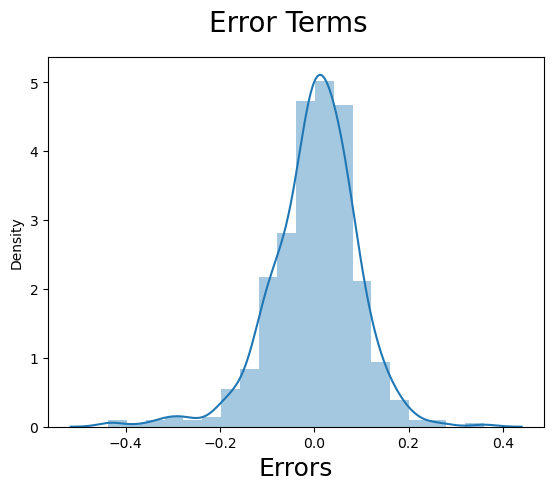

In [1249]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Observation : 
- Errors terms are normally distributed and the mean is 0

### Making Predictions on TEST data

In [1250]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1251]:
# Divide the X and Y training data
y_test = df_test.pop('cnt')
X_test = df_test

In [1252]:
y_test.head(2)

184    0.692706
535    0.712034
Name: cnt, dtype: float64

In [1253]:
X_test.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,...,misty,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
184,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0.901354,0.610133,0.153728


In [1254]:
# Removing the constant from the final dataset
X_train_model_5_final.drop("const", axis=1, inplace=True)


In [1255]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_model_5_final.columns]


In [1256]:
# Adding constant to the test dataset
X_test_new = sm.add_constant(X_test_new)

In [1257]:
X_test_new.head(2)

,const,Sunday,January,September,light_snow,misty,spring,winter,yr,temp,windspeed
184,1.0,0,0,0,0,1,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,0,0,0,1,0.901354,0.153728


In [1258]:
# Making predictions on test data
y_pred = lm.predict(X_test_new)

In [1001]:
y_pred.head(2)

184    0.514730
535    0.845901
dtype: float64

Text(0, 0.5, 'y_pred')

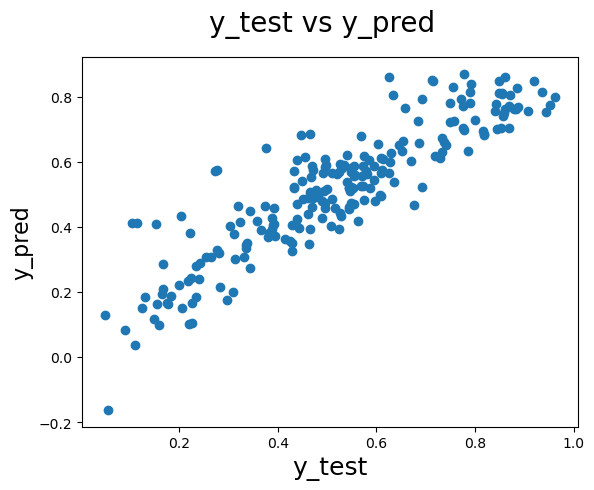

In [1260]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Observation :
- The predicted value and the actual values look to be closer to each other

In [1261]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1262]:
# Checking the R^2 value for test datset
r_squared = r2_score(y_true=y_test, y_pred = y_pred)
r_squared*100

80.02858320678644

In [1263]:
# Checking the R^2 value for training datset
r_squared = r2_score(y_true=y_train, y_pred = y_train_cnt)
r_squared*100

83.0241609465403

##### Observation : 
- The difference between the training and test dataset R^2 values is arounf 3%

## Final Equation

##### Best fitted line : 

### cnt = 0.2876 + (-0.0464) x Sunday + (-0.0501) x January + 0.0647 x September + (-0.2904) x light_snow + (-0.0778) x misty + (-0.1069) x spring + 0.0421 x winter + 0.2364 x yr + 0.3905 x temp + (-0.1474) x windspeed

### Conclusion :
- temp plays the important role in customer opting for the rent
- There is a major spike in the year by year data
- There's less business on Holidays
- Business during winter is better than spring season
- The month of January has seen less sales compared to end of the year 

In [1273]:
import numpy
print(sklearn.__version__)

1.3.0
